In [1]:
## Import packages

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
## find file path

%cd /Users/tianqi/Downloads/Capstone Data

/Users/tianqi/Downloads/Capstone Data


In [3]:
df = pd.read_csv('/Users/tianqi/Downloads/Capstone Data/store6eggs.csv')

In [4]:
df.head()

,id,date,item_nbr,unit_sales,onpromotion,holiday_type,transferred,class,dcoilwtico
0,6028,2013-01-02,127547,11.0,True,Work Day,True,2502,93.14
1,6045,2013-01-02,158680,3.0,True,Work Day,True,2502,93.14
2,6086,2013-01-02,208384,41.0,True,Work Day,True,2502,93.14
3,6087,2013-01-02,208386,13.0,True,Work Day,True,2502,93.14
4,6128,2013-01-02,227111,5.0,True,Work Day,True,2502,93.14


In [5]:
## change data type of "date", (not necessary in Azure)
df['date'] = df['date'].astype('datetime64[ns]')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46353 entries, 0 to 46352
Data columns (total 9 columns):
id              46353 non-null int64
date            46353 non-null datetime64[ns]
item_nbr        46353 non-null int64
unit_sales      46353 non-null float64
onpromotion     46353 non-null bool
holiday_type    46353 non-null object
transferred     46353 non-null bool
class           46353 non-null int64
dcoilwtico      46353 non-null float64
dtypes: bool(2), datetime64[ns](1), float64(2), int64(3), object(1)
memory usage: 2.6+ MB


In [7]:
## obtain total unit_sales for each day
total_sales = df.groupby('date').sum()
total_sales.head()

,id,item_nbr,unit_sales,onpromotion,transferred,class,dcoilwtico
date,,,,,,,
2013-01-02,160047,12231785,360.0,25.0,25.0,62552,2328.50
2013-01-03,1196207,12231785,253.0,25.0,25.0,62552,2324.25
2013-01-04,2199488,12231785,204.0,25.0,25.0,62552,2328.00
2013-01-05,3207140,12231785,259.0,25.0,0.0,62552,2328.00
2013-01-06,4092834,12104238,445.0,24.0,24.0,60050,2234.88


In [8]:
total_sales.drop(['id', 'item_nbr', 'onpromotion', 'transferred', 'class', 'dcoilwtico'],axis=1,inplace=True)
total_sales.head()

,unit_sales
date,
2013-01-02,360.0
2013-01-03,253.0
2013-01-04,204.0
2013-01-05,259.0
2013-01-06,445.0


In [9]:
df.drop(['id', 'item_nbr', 'unit_sales', 'onpromotion', 'holiday_type', 'transferred', 'class'],axis=1,inplace=True)
df = df.drop_duplicates('date')
df = df.set_index('date')
df.head()

,dcoilwtico
date,
2013-01-02,93.14
2013-01-03,92.97
2013-01-04,93.12
2013-01-05,93.12
2013-01-06,93.12


In [10]:
## a new dataframe with date, total unit sales and oil prices
data=pd.merge(total_sales,df,on='date',how="left")
data.head(10)

,unit_sales,dcoilwtico
date,,
2013-01-02,360.0,93.14
2013-01-03,253.0,92.97
2013-01-04,204.0,93.12
2013-01-05,259.0,93.12
2013-01-06,445.0,93.12
2013-01-07,189.0,93.20
2013-01-08,168.0,93.21
2013-01-09,172.0,93.08
2013-01-10,122.0,93.81


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1679 entries, 2013-01-02 to 2017-08-15
Data columns (total 2 columns):
unit_sales    1679 non-null float64
dcoilwtico    1679 non-null float64
dtypes: float64(2)
memory usage: 39.4 KB


In [12]:
#creating the train and validation set
train = data.loc[:'2016-12-31']
test = data.loc['2017-01-01':]

/Users/tianqi/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/statespace/varmax.py:159: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  EstimationWarning)
/Users/tianqi/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                                Statespace Model Results                                
Dep. Variable:     ['unit_sales', 'dcoilwtico']   No. Observations:                 1679
Model:                               VARMA(5,1)   Log Likelihood              -11525.497
                                    + intercept   AIC                          23108.995
Date:                          Thu, 31 Oct 2019   BIC                          23266.348
Time:                                  17:13:43   HQIC                         23167.284
Sample:                                       0                                         
                                         - 1679                                         
Covariance Type:                            opg                                         
Ljung-Box (Q):              2391.39, 27.77   Jarque-Bera (JB):     1825.39, 1504.38
Prob(Q):                        0.00, 0.93   Prob(JB):                   0.00, 0.00
Heteroskedasticity (H):        

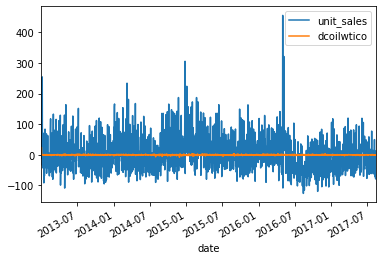

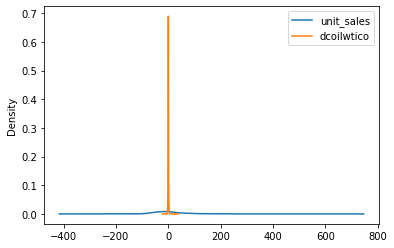

        unit_sales   dcoilwtico
count  1679.000000  1679.000000
mean      0.580715    -0.015185
std      55.130142     1.165688
min    -125.914191    -7.705064
25%     -36.862704    -0.391594
50%      -6.698211    -0.007937
75%      27.666528     0.353556
max     455.763635    23.375719


In [13]:
# VARMA example
from pandas import DataFrame
from matplotlib import pyplot
from statsmodels.tsa.statespace.varmax import VARMAX

# fit model
model = VARMAX(data, order=(5, 1))
model_fit = model.fit()
print(model_fit.summary())
# plot residual errors
residuals = DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()
residuals.plot(kind='kde')
pyplot.show()
print(residuals.describe())

1. model results including the coefficient values

2. Line plot of the residual errors;

3. Density plot of the residual error values;

4. The distribution of the residual errors is displayed.

The results show that indeed there is a bias in the prediction (a non-zero mean in the residuals).

In [14]:
# make prediction on validation
from sklearn.metrics import mean_squared_error
 
def parser(x):
	return datetime.strptime('201'+x, '%Y-%m')
 
series = data
X = series.values
size = int(len(X) * 0.8)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
for t in range(len(test)):
	model = VARMAX(history, order=(5, 1))
	model_fit = model.fit()
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)

## Test MSE: 1443.801

/Users/tianqi/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/statespace/varmax.py:159: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  EstimationWarning)
/Users/tianqi/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/statespace/varmax.py:159: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  EstimationWarning)
/Users/tianqi/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/statespace/varmax.py:159: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  EstimationWarning)
/Users/tianqi/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/statespace/varmax.py:159: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  EstimationWarning)
/Users/tianqi/anaconda3/lib/python3.7/site-packages/statsmodels/

/Users/tianqi/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/statespace/varmax.py:159: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  EstimationWarning)
/Users/tianqi/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/statespace/varmax.py:159: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  EstimationWarning)
/Users/tianqi/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/statespace/varmax.py:159: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  EstimationWarning)
/Users/tianqi/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/statespace/varmax.py:159: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  EstimationWarning)
/Users/tianqi/anaconda3/lib/python3.7/site-packages/statsmodels/

/Users/tianqi/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/statespace/varmax.py:159: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  EstimationWarning)
/Users/tianqi/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/statespace/varmax.py:159: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  EstimationWarning)
/Users/tianqi/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/statespace/varmax.py:159: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  EstimationWarning)
/Users/tianqi/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/statespace/varmax.py:159: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  EstimationWarning)
/Users/tianqi/anaconda3/lib/python3.7/site-packages/statsmodels/

/Users/tianqi/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/statespace/varmax.py:159: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  EstimationWarning)
/Users/tianqi/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/statespace/varmax.py:159: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  EstimationWarning)
/Users/tianqi/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/statespace/varmax.py:159: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  EstimationWarning)
/Users/tianqi/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/statespace/varmax.py:159: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  EstimationWarning)
/Users/tianqi/anaconda3/lib/python3.7/site-packages/statsmodels/

/Users/tianqi/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/statespace/varmax.py:159: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  EstimationWarning)
/Users/tianqi/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/statespace/varmax.py:159: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  EstimationWarning)
/Users/tianqi/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/statespace/varmax.py:159: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  EstimationWarning)
/Users/tianqi/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/statespace/varmax.py:159: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  EstimationWarning)
/Users/tianqi/anaconda3/lib/python3.7/site-packages/statsmodels/

/Users/tianqi/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/statespace/varmax.py:159: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  EstimationWarning)
/Users/tianqi/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/statespace/varmax.py:159: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  EstimationWarning)
/Users/tianqi/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/statespace/varmax.py:159: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  EstimationWarning)
/Users/tianqi/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/statespace/varmax.py:159: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  EstimationWarning)
/Users/tianqi/anaconda3/lib/python3.7/site-packages/statsmodels/

/Users/tianqi/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/statespace/varmax.py:159: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  EstimationWarning)
/Users/tianqi/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/statespace/varmax.py:159: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  EstimationWarning)
/Users/tianqi/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/statespace/varmax.py:159: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  EstimationWarning)
/Users/tianqi/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/statespace/varmax.py:159: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  EstimationWarning)
/Users/tianqi/anaconda3/lib/python3.7/site-packages/statsmodels/

/Users/tianqi/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/statespace/varmax.py:159: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  EstimationWarning)
/Users/tianqi/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/statespace/varmax.py:159: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  EstimationWarning)
/Users/tianqi/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/statespace/varmax.py:159: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  EstimationWarning)
/Users/tianqi/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/statespace/varmax.py:159: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  EstimationWarning)
/Users/tianqi/anaconda3/lib/python3.7/site-packages/statsmodels/

/Users/tianqi/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/statespace/varmax.py:159: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  EstimationWarning)
/Users/tianqi/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/statespace/varmax.py:159: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  EstimationWarning)
/Users/tianqi/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/statespace/varmax.py:159: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  EstimationWarning)
/Users/tianqi/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/statespace/varmax.py:159: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  EstimationWarning)
/Users/tianqi/anaconda3/lib/python3.7/site-packages/statsmodels/

/Users/tianqi/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/statespace/varmax.py:159: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  EstimationWarning)
/Users/tianqi/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/statespace/varmax.py:159: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  EstimationWarning)
/Users/tianqi/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/statespace/varmax.py:159: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  EstimationWarning)
/Users/tianqi/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/statespace/varmax.py:159: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  EstimationWarning)
/Users/tianqi/anaconda3/lib/python3.7/site-packages/statsmodels/

/Users/tianqi/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/Users/tianqi/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/statespace/varmax.py:159: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  EstimationWarning)
/Users/tianqi/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/statespace/varmax.py:159: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  EstimationWarning)
/Users/tianqi/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/Users/tianqi/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/statespace/varmax.py:159: Estima

/Users/tianqi/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/statespace/varmax.py:159: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  EstimationWarning)
/Users/tianqi/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/statespace/varmax.py:159: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  EstimationWarning)
/Users/tianqi/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/statespace/varmax.py:159: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  EstimationWarning)
/Users/tianqi/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/statespace/varmax.py:159: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  EstimationWarning)
/Users/tianqi/anaconda3/lib/python3.7/site-packages/statsmodels/

/Users/tianqi/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/statespace/varmax.py:159: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  EstimationWarning)
/Users/tianqi/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/statespace/varmax.py:159: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  EstimationWarning)
/Users/tianqi/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/statespace/varmax.py:159: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  EstimationWarning)
/Users/tianqi/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/statespace/varmax.py:159: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  EstimationWarning)
/Users/tianqi/anaconda3/lib/python3.7/site-packages/statsmodels/

/Users/tianqi/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/statespace/varmax.py:159: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  EstimationWarning)
/Users/tianqi/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/statespace/varmax.py:159: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  EstimationWarning)
/Users/tianqi/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/statespace/varmax.py:159: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  EstimationWarning)
/Users/tianqi/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/statespace/varmax.py:159: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  EstimationWarning)
/Users/tianqi/anaconda3/lib/python3.7/site-packages/statsmodels/

/Users/tianqi/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/Users/tianqi/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/statespace/varmax.py:159: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  EstimationWarning)
/Users/tianqi/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/statespace/varmax.py:159: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  EstimationWarning)
/Users/tianqi/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/statespace/varmax.py:159: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  EstimationWarning)
/Users/tianqi/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/statespace/var

/Users/tianqi/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/statespace/varmax.py:159: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  EstimationWarning)
/Users/tianqi/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/statespace/varmax.py:159: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  EstimationWarning)
/Users/tianqi/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/statespace/varmax.py:159: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  EstimationWarning)
/Users/tianqi/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/statespace/varmax.py:159: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  EstimationWarning)
/Users/tianqi/anaconda3/lib/python3.7/site-packages/statsmodels/

/Users/tianqi/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/statespace/varmax.py:159: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  EstimationWarning)
/Users/tianqi/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/statespace/varmax.py:159: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  EstimationWarning)
/Users/tianqi/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/statespace/varmax.py:159: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  EstimationWarning)
/Users/tianqi/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/statespace/varmax.py:159: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  EstimationWarning)
/Users/tianqi/anaconda3/lib/python3.7/site-packages/statsmodels/

/Users/tianqi/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/statespace/varmax.py:159: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  EstimationWarning)
/Users/tianqi/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/statespace/varmax.py:159: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  EstimationWarning)
/Users/tianqi/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/statespace/varmax.py:159: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  EstimationWarning)
/Users/tianqi/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/statespace/varmax.py:159: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  EstimationWarning)
/Users/tianqi/anaconda3/lib/python3.7/site-packages/statsmodels/

/Users/tianqi/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/statespace/varmax.py:159: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  EstimationWarning)
/Users/tianqi/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/statespace/varmax.py:159: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  EstimationWarning)
/Users/tianqi/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/statespace/varmax.py:159: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  EstimationWarning)
/Users/tianqi/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/statespace/varmax.py:159: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  EstimationWarning)
/Users/tianqi/anaconda3/lib/python3.7/site-packages/statsmodels/

/Users/tianqi/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/statespace/varmax.py:159: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  EstimationWarning)
/Users/tianqi/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/statespace/varmax.py:159: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  EstimationWarning)
/Users/tianqi/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/statespace/varmax.py:159: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  EstimationWarning)
/Users/tianqi/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/statespace/varmax.py:159: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  EstimationWarning)
/Users/tianqi/anaconda3/lib/python3.7/site-packages/statsmodels/

Test MSE: 1227.607


/Users/tianqi/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/statespace/varmax.py:159: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  EstimationWarning)


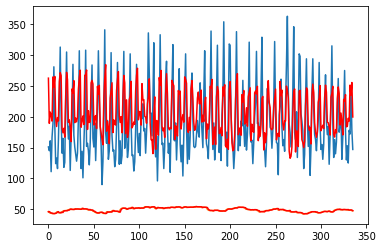

In [15]:
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()

In [16]:
### Mean absolute percentage error (MAPE)

def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

y_true = test; y_pred = predictions

mean_absolute_percentage_error(y_true, y_pred)

12.415511100954738